In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf
import keras.models
#from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D ,Flatten , Dense, Dropout
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from PIL import Image
from keras.models import Model, Sequential
from keras.layers import GlobalAveragePooling2D , BatchNormalization;
#from models import custom_convnet
from keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from keras.layers import Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# NLP

In [2]:
pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [3]:
med=pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

In [4]:
med.isnull().sum()>0

Unnamed: 0    False
0             False
a             False
dtype: bool

In [5]:
med=med.loc[:,['0','a']]

In [6]:
med

,0,a
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [7]:
med=med.rename(columns={'0':'y','a':'x'})

In [8]:
med

,y,x
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...
7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [9]:
med.y.value_counts()

Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: y, dtype: int64

In [10]:
med.head()

,y,x
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [11]:
med=med.replace({'Thyroid_Cancer':0,'Colon_Cancer':1,'Lung_Cancer':2})

In [12]:
med

,y,x
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...
4,0,This study aimed to investigate serum matrix ...
...,...,...
7565,1,we report the case of a 24yearold man who pres...
7566,1,among synchronous colorectal cancers scrcs rep...
7567,1,the heterogeneity of cancer cells is generally...
7568,1,"""adipogenesis is the process through which mes..."


In [13]:
med.x=med.x.str.lower()
# before doing any analysis convert data into lower or upper

In [14]:
med.head()

,y,x
0,0,thyroid surgery in children in a single insti...
1,0,""" the adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,solitary plasmacytoma sp of the skull is an u...
4,0,this study aimed to investigate serum matrix ...


In [15]:
from nltk.corpus import stopwords
l1=stopwords.words("english")
# we remove them

In [16]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def text_process(mess):
    """
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc="".join(nopunc)
    
    return [word for word in nopunc.split() if word not in l1]

In [18]:
med['x'].apply(text_process)

0       [thyroid, surgery, children, single, instituti...
1       [adopted, strategy, used, prior, years, based,...
2       [coronary, arterybypass, grafting, thrombosis,...
3       [solitary, plasmacytoma, sp, skull, uncommon, ...
4       [study, aimed, investigate, serum, matrix, met...
                              ...                        
7565    [report, case, 24yearold, man, presented, chie...
7566    [among, synchronous, colorectal, cancers, scrc...
7567    [heterogeneity, cancer, cells, generally, acce...
7568    [adipogenesis, process, mesenchymalstem, cells...
7569    [periparturient, period, one, challenging, per...
Name: x, Length: 7570, dtype: object

In [19]:
# create a TDM 
from sklearn.feature_extraction.text import CountVectorizer  # this is used to count each and every unique word...

In [20]:
import timeit
start=timeit.default_timer()

bow_transformer=CountVectorizer(analyzer=text_process).fit(med['x'])

stop=timeit.default_timer()
execution_time=stop-start
print("Program executed in ",execution_time)

Program executed in  55.98492669999541


In [21]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(med['x'])

In [22]:
bow_transformer.vocabulary_

{'thyroid': 184741,
 'surgery': 175947,
 'children': 46891,
 'single': 168501,
 'institution': 98617,
 'osama': 136431,
 'ibrahim': 92838,
 'almosallama': 20757,
 'ali': 20228,
 'aseerib': 29353,
 'ahmed': 19380,
 'alhumaida': 20227,
 'alzahranic': 21414,
 'saif': 162107,
 'alsobhib': 21042,
 'saud': 162972,
 'alshanafeybfrom': 21011,
 'adepartment': 17640,
 'college': 50334,
 'medicine': 115868,
 'qassim': 152212,
 'university': 192186,
 'buraidah': 38772,
 'al': 19740,
 'saudi': 162975,
 'arabia': 28159,
 'bdepartment': 33374,
 'king': 104964,
 'faisal': 73922,
 'specialist': 170954,
 'hospital': 90004,
 'research': 157570,
 'center': 45364,
 'riyadh': 159726,
 'cdepartment': 44123,
 'correspondence': 53898,
 'dr': 64913,
 'almosallam': 20756,
 'department': 59660,
 'po': 145525,
 'box': 37574,
 'osamaiaahotmailcom': 136432,
 'orcid': 135793,
 'orcid0000000290367564': 135798,
 'citation': 48335,
 'oi': 134246,
 'aseeri': 29352,
 'alhumaid': 20226,
 'alzahrani': 21413,
 'alsobhi': 210

In [23]:
len(bow_transformer.vocabulary_)
# there are 208269 unique words after removing punctuation and stopwords
# that when we create our TDM our tdm will have 208269 columns

208269

In [24]:
tdm=bow_transformer.transform(med['x'])

In [25]:
tdm.shape

(7570, 208269)

In [26]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [27]:
# tdm is like our x variable 
from sklearn.model_selection import train_test_split
tdm_train,tdm_test,train_y,test_y=train_test_split(tdm,med['y'],test_size=.2)

In [28]:
tdm_train.shape

(6056, 208269)

In [29]:
train_y.shape

(6056,)

In [30]:
# tdm is like our x variable 
from sklearn.model_selection import train_test_split
tdm_train,tdm_test,train_y,test_y=train_test_split(tdm,med['y'],test_size=.2)

tdm_train.shape

train_y.shape

(6056,)

In [31]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()
nb.fit(tdm_train,train_y)

MultinomialNB()

In [32]:
pred_nb=nb.predict(tdm_test)

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [34]:
tab_nb=confusion_matrix(test_y,pred_nb)
tab_nb

array([[496,  71,   0],
       [ 45, 472,   0],
       [  0,   0, 430]], dtype=int64)

In [35]:
accuracy_score(test_y,pred_nb)

0.9233817701453104

In [36]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [37]:
logreg.fit(tdm_train,train_y)

C:\Users\Vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
pred_log=logreg.predict(tdm_test)

In [39]:
tab_log=confusion_matrix(test_y,pred_log)
tab_log

array([[567,   0,   0],
       [  0, 517,   0],
       [  0,   0, 430]], dtype=int64)

In [40]:
accuracy_score(test_y,pred_log)

1.0

In [41]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [42]:
dec.fit(tdm_train,train_y)

DecisionTreeClassifier()

In [43]:
pred_dec=dec.predict(tdm_test)

In [44]:
tab_dec=confusion_matrix(test_y,pred_dec)
tab_dec

array([[567,   0,   0],
       [  0, 517,   0],
       [  0,   0, 430]], dtype=int64)

In [45]:
accuracy_score(test_y,pred_dec)

1.0

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [47]:
rfc.fit(tdm_train,train_y)

RandomForestClassifier()

In [48]:
pred_rfc=rfc.predict(tdm_test)

In [49]:
tab_rfc=confusion_matrix(test_y,pred_rfc)
tab_rfc

array([[567,   0,   0],
       [  0, 517,   0],
       [  0,   0, 430]], dtype=int64)

In [50]:
accuracy_score(test_y,pred_rfc)

1.0

In [51]:
import matplotlib.pyplot as plt

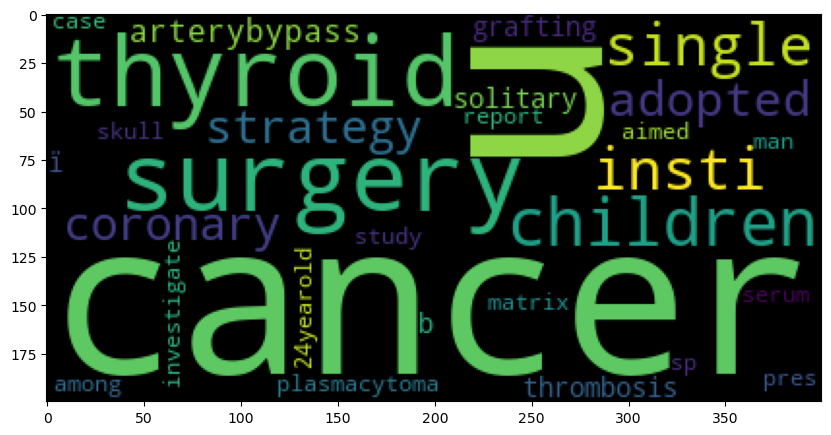

In [52]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=30).generate(str(med['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [53]:
med_spam_df0=med[med.y==0]

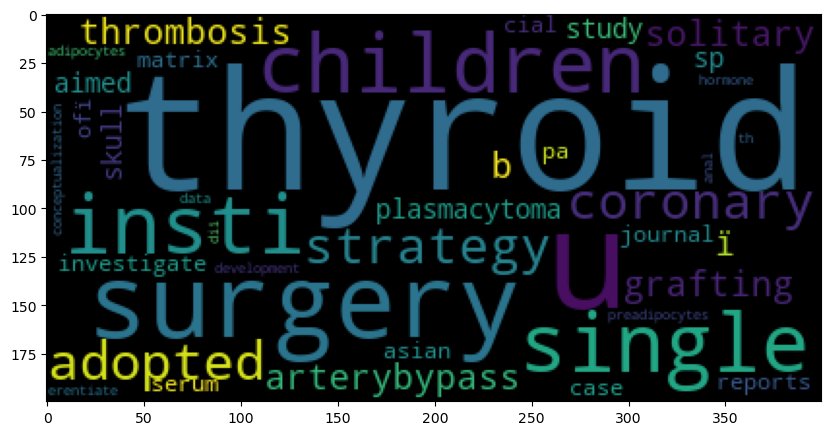

In [54]:
from wordcloud import WordCloud
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(med_spam_df0['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [55]:
med_spam_df1=med[med.y==1]

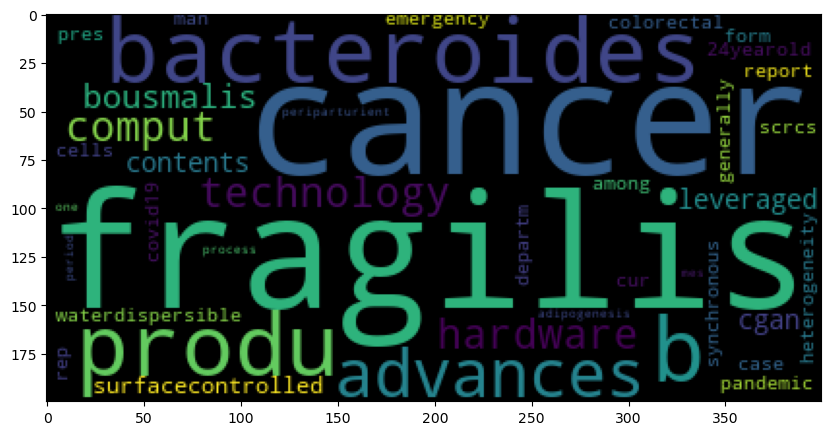

In [56]:
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(med_spam_df1['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [57]:
med_spam_df2=med[med.y==2]

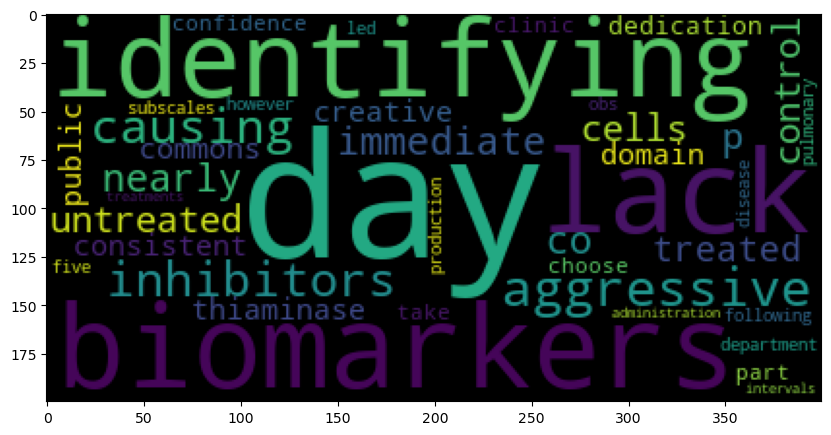

In [58]:
cloud=WordCloud(stopwords=stopwords.words('english'),max_words=40).generate(str(med_spam_df2['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

# LSTM

In [60]:
pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [61]:
med=pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

In [62]:
df=pd.DataFrame(med['0'])

In [63]:
df['x']=med['a']

In [64]:
df.rename(columns={'0':'y'},inplace=True)

In [65]:
df.y=df.y.replace({'Thyroid_Cancer':0,'Colon_Cancer':1,'Lung_Cancer':2})


In [66]:
df.head()

,y,x
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...
4,0,This study aimed to investigate serum matrix ...


In [67]:
df.y.nunique()

3

In [68]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [69]:
df_x=df.iloc[:,1]
df_y=df.iloc[:,0]
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2)

In [70]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your class labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [71]:
max_num_words=8000 #from entire corpus sleect 10000 words
seq_len=100 # how many words out of 10000 you wish to take from each document
embedding_size=100 #vector length of each word

In [72]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [73]:
tokenizer=Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(df.x)
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [74]:
x_train=pad_sequences(x_train,maxlen=seq_len)
x_test=pad_sequences(x_test,maxlen=seq_len)

model=Sequential()
model.add(Embedding(input_dim=max_num_words,
                   input_length=seq_len,
                   output_dim=embedding_size))

In [75]:
model.add(LSTM(128))
model.add(Dense(3,activation='softmax'))

from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=.001)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
model.fit(x_train,y_train,epochs=8,batch_size=32,validation_split=.2)

Epoch 1/8


152/152 [==============================] - 9s 44ms/step - loss: 0.6088 - accuracy: 0.7052 - val_loss: 0.3012 - val_accuracy: 0.8886
Epoch 2/8
152/152 [==============================] - 7s 43ms/step - loss: 0.1093 - accuracy: 0.9641 - val_loss: 0.1495 - val_accuracy: 0.9645
Epoch 3/8
152/152 [==============================] - 6s 41ms/step - loss: 0.0719 - accuracy: 0.9717 - val_loss: 0.0592 - val_accuracy: 0.9686
Epoch 4/8
152/152 [==============================] - 6s 42ms/step - loss: 0.0477 - accuracy: 0.9777 - val_loss: 0.0452 - val_accuracy: 0.9752
Epoch 5/8
152/152 [==============================] - 6s 41ms/step - loss: 0.0400 - accuracy: 0.9806 - val_loss: 0.0415 - val_accuracy: 0.9785
Epoch 6/8
152/152 [==============================] - 6s 42ms/step - loss: 0.0361 - accuracy: 0.9825 - val_loss: 0.0427 - val_accuracy: 0.9777
Epoch 7/8
152/152 [==============================] - 6s 41ms/step - loss: 0.0345 - accuracy: 0.9829 - val_loss: 0.0780 - val_accuracy: 0.9571
Epoc

In [77]:
pred_prob=model.predict(x_test)

48/48 [==============================] - 1s 14ms/step


In [78]:
pred=pred_prob.argmax(axis=1)

In [79]:
y_test=y_test.argmax(axis=1)

In [80]:
confusion_matrix(y_test,pred)

array([[492,  20,   0],
       [  5, 565,   0],
       [  0,   2, 430]], dtype=int64)

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       512
           1       0.96      0.99      0.98       570
           2       1.00      1.00      1.00       432

    accuracy                           0.98      1514
   macro avg       0.98      0.98      0.98      1514
weighted avg       0.98      0.98      0.98      1514



In [82]:
accuracy_score(y_test,pred)

0.9821664464993395

# Bidirection

In [83]:
pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...
...,...,...,...
7565,7565,Colon_Cancer,we report the case of a 24yearold man who pres...
7566,7566,Colon_Cancer,among synchronous colorectal cancers scrcs rep...
7567,7567,Colon_Cancer,the heterogeneity of cancer cells is generally...
7568,7568,Colon_Cancer,"""adipogenesis is the process through which mes..."


In [84]:
med=pd.read_csv(r"D:\Medical.csv",encoding='latin-1')

In [85]:
med=med.loc[:,['0','a']]

In [86]:
med=med.rename(columns={'0':'y','a':'x'})


In [87]:
med=med.replace({'Thyroid_Cancer':0,'Colon_Cancer':1,'Lung_Cancer':2})
med.head()


,y,x
0,0,Thyroid surgery in children in a single insti...
1,0,""" The adopted strategy was the same as that us..."
2,0,coronary arterybypass grafting thrombosis ï¬b...
3,0,Solitary plasmacytoma SP of the skull is an u...
4,0,This study aimed to investigate serum matrix ...


In [88]:
med_x =  med.iloc[:,1]
med_y = med.iloc[:,0]
from sklearn.model_selection import train_test_split


In [89]:
x_train, x_test, y_train, y_test = train_test_split(med_x, med_y, test_size=.2)


In [90]:
y_train = to_categorical(y_train) # one hot endcoding


In [91]:
max_num_words = 8000      # from the entire corpus select 10000 words
seq_len = 100               # how many words out of 10000 you wish to take from each document
embeddings_size = 100      # vector length of each word


In [92]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [93]:
tokenizer = Tokenizer(num_words = max_num_words)
tokenizer.fit_on_texts(med.x)
x_train = tokenizer.texts_to_sequences(x_train)

x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=seq_len)


x_test = pad_sequences(x_test, maxlen=seq_len)


In [94]:
model = Sequential() # initialize the network
model.add(Embedding(input_dim= max_num_words,
                   input_length= seq_len,
                   output_dim = embeddings_size))


In [95]:
model.add(Bidirectional(LSTM(65)))
model.add(Dense(3, activation='softmax'))# Dense 2--> spam and ham


In [96]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate = .001)
model.compile(optimizer='adam', loss ='categorical_crossentropy', metrics =['accuracy'])


In [97]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, validation_split=.2)

Epoch 1/5
152/152 [==============================] - 9s 39ms/step - loss: 0.5942 - accuracy: 0.7389 - val_loss: 0.1348 - val_accuracy: 0.9620
Epoch 2/5
152/152 [==============================] - 5s 36ms/step - loss: 0.0682 - accuracy: 0.9761 - val_loss: 0.0265 - val_accuracy: 0.9926
Epoch 3/5
152/152 [==============================] - 5s 35ms/step - loss: 0.0411 - accuracy: 0.9827 - val_loss: 0.0209 - val_accuracy: 0.9893
Epoch 4/5
152/152 [==============================] - 7s 45ms/step - loss: 0.0520 - accuracy: 0.9771 - val_loss: 0.1200 - val_accuracy: 0.9315
Epoch 5/5
152/152 [==============================] - 7s 46ms/step - loss: 0.0550 - accuracy: 0.9787 - val_loss: 0.0119 - val_accuracy: 0.9959


In [98]:
pred=model.predict(x_test)
pred


48/48 [==============================] - 1s 11ms/step


array([[9.9934655e-01, 5.3636666e-04, 1.1705425e-04],
       [9.9932432e-01, 5.6766352e-04, 1.0800140e-04],
       [9.9735129e-01, 2.3106216e-03, 3.3811206e-04],
       ...,
       [2.1019546e-04, 6.6259858e-04, 9.9912721e-01],
       [1.2641451e-03, 9.9829787e-01, 4.3802074e-04],
       [8.4826970e-05, 9.9989593e-01, 1.9227040e-05]], dtype=float32)

In [99]:
pred_classes=pred.argmax(axis=1)


In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [101]:
tab=confusion_matrix(y_test,pred_classes)
tab


array([[574,   3,   0],
       [ 12, 490,   0],
       [  0,   0, 435]], dtype=int64)

In [102]:
accuracy_score(y_test,pred_classes)

0.9900924702774109

# RNN

In [103]:
model = Sequential()
model.add(Embedding(input_dim=max_num_words, input_length=seq_len, output_dim=embeddings_size))
model.add(Bidirectional(LSTM(65)))
model.add(Dense(3, activation='softmax'))


In [104]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
pred=model.predict(x_test)
pred


In [ ]:
pred_classes=pred.argmax(axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
tab=confusion_matrix(y_test,pred_classes)
tab


In [ ]:
accuracy_score(y_test,pred_classes)